In [6]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, degree, width_factor=2.0):
        self.N = degree
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        print(X.min(), X.max(), self.N)
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

(100, 1)
5.0 20.0 9


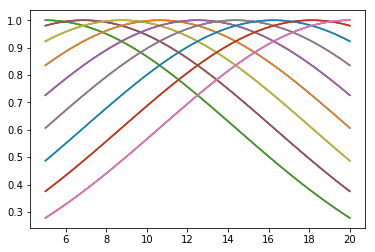

In [83]:
import numpy as np

array = np.array([
    [1],
    [2],
    [3],
    [4],
    [5],
    [6],
    [7]
])

features = 9
points = 100
array = np.linspace(5, 20,points).reshape(points,1)

print(array.shape)
gf = GaussianFeatures(features, 5)
gf.fit(array)
values = gf.transform(array)


import matplotlib.pyplot as plt
for feature in range(features):
    plt.plot(array[:,0], values[:,feature])
    plt.plot(array[:,0], values[:,feature])
    plt.plot(array[:,0], values[:,feature])
plt.show()

[ 1.          1.65517241  2.31034483  2.96551724  3.62068966  4.27586207
  4.93103448  5.5862069   6.24137931  6.89655172  7.55172414  8.20689655
  8.86206897  9.51724138 10.17241379 10.82758621 11.48275862 12.13793103
 12.79310345 13.44827586 14.10344828 14.75862069 15.4137931  16.06896552
 16.72413793 17.37931034 18.03448276 18.68965517 19.34482759 20.        ]


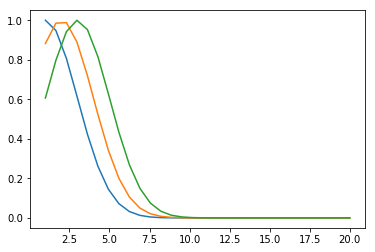